# Linear regression on sum of all pixels

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

In [2]:
import operate_datasets
import model_visualisation
import model_evaluation

Welcome to JupyROOT 6.18/00


## Load data

In [3]:
full_X, full_y = operate_datasets.load_dataset('~/snd_data/new_dataset/', 'sum')
min_clip = 25

X_train, y_train, _, _ = operate_datasets.split_dataset(full_X, full_y)
X_train, y_train = operate_datasets.clip_dataset(X_train, y_train, min_clip)

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

## Fit regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [5]:
reg_l2 = LinearRegression()   .fit(X_train, y_train) # positive=True ???
#reg_l1 = Lasso(positive=False).fit(X_train, y_train) # positive=True ???

score_l2 = reg_l2.score(X_train.reshape(-1, 1), y_train)

print('L2: ', score_l2)

y_pred_l2 = reg_l2.predict(X_train)

L2:  0.2362499696823066


## Visualise results

In [6]:
print('y = kx + b')
print('k', reg_l2.coef_)
print('b', reg_l2.intercept_)

y = kx + b
k [[4.3983722e-05]]
b [0.12239027]


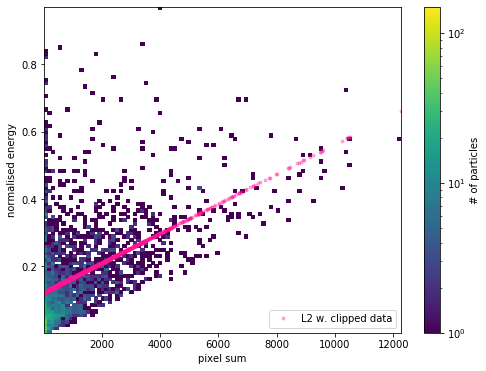

In [7]:
model_visualisation.plot_2d_energy_hist(X_train, y_train, y_pred_l2) 

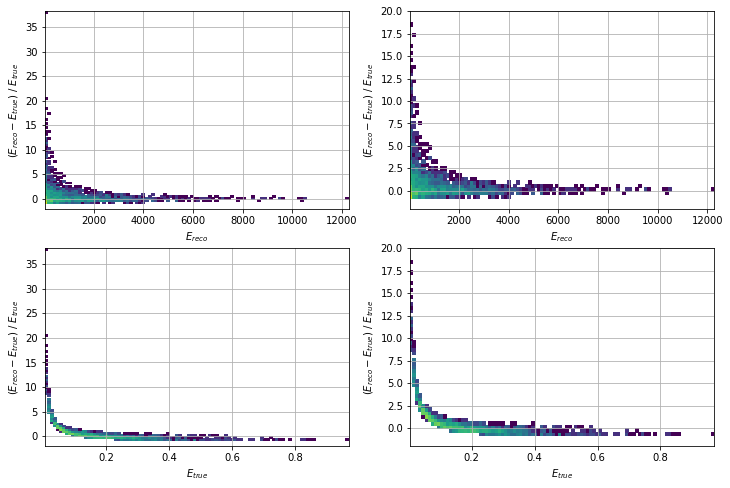

In [8]:
model_visualisation.plot_res_vs_energy(X_train, y_train, y_pred_l2) 

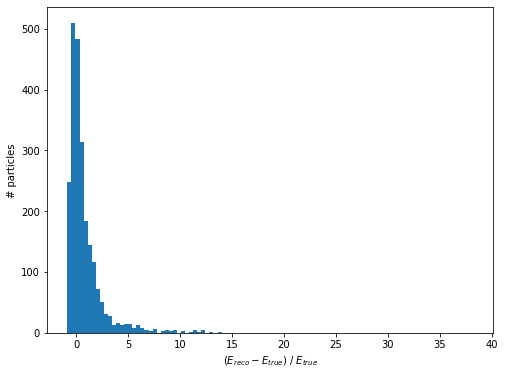

In [9]:
model_visualisation.plot_res_hist(y_train, y_pred_l2)

In [10]:
model_evaluation.get_scores(y_train, y_pred_l2)

explained_variance_score 0.2362499696823066
max_error 0.7200595932073045
mean_absolute_error 0.08855144221650643
mean_squared_error 0.015148897907780986
mean_squared_log_error 0.009410966036480279
median_absolute_error 0.07579413544166627
r2_score 0.2362499696823066


{'explained_variance_score': 0.2362499696823066,
 'max_error': 0.7200595932073045,
 'mean_absolute_error': 0.08855144221650643,
 'mean_squared_error': 0.015148897907780986,
 'mean_squared_log_error': 0.009410966036480279,
 'median_absolute_error': 0.07579413544166627,
 'r2_score': 0.2362499696823066}